# Project 1: Building Classifiers

UIC CS 412, Fall 2018

_According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually.  While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading.  This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance.  Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums.  Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you.  Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml_

In this project, you will build classifiers using decision trees, nearest neighbors, and perceptron, to make decisions on a few different datasets. The code for this project consists of several Python files, some of which you will need to read and understand in order to complete the assignment, and some of which you can ignore.


### Files You'll Edit

``dumbClassifiers.py``: This contains a handful of "warm up"
classifiers to get you used to our classification framework.
  
``dt.py``: Will be your simple implementation of a decision tree classifier.
  
``knn.py``: This is where your nearest-neighbor classifier modifications
will go.

``perceptron.py``: The perceptron file you need to edit.

### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.


# Part 1: Simple classifiers (5%)

Let's begin our foray into classification by looking at some very
simple classifiers.  There are two classifiers
in ``dumbClassifiers.py``, one is implemented for you, the other
one you will need to fill in appropriately.

The already implemented one is ``AlwaysPredictOne``, a classifier that
(as its name suggest) always predicts the positive class.  We're going
to use the ``SentimentData`` dataset from ``datasets.py`` as a running
example to test your functions.  Let's see how well 
this classifier does on this data.  You should begin by importing ``util``,
``datasets``, ``binary`` and ``dumbClassifiers``.  Also, be sure you
always have ``from numpy import *`` and ``from pylab import *``. You
can achieve this with ``from imports import *`` to make life easier.

We will look at a simple binary classification task: sentiment analysis (is this review a positive or negative evaluation of a product?). We'll use the presence/absence of words in the text as features. If you look in data/sentiment.all, you'll see the data for the sentiment prediction task. The first column contains the class value of zero or one (one = positive, zero = negative). The rest is a list of all the words that appear in this product reivew. These are binary features: any word listed has value "=1" and any word not listed has value "=0" (implicitly... it would be painful to list all non-occurring words!).
As you write these functions, feel free to test your code on the much smaller TennisData dataset provided in datasets.py, so you can visually inspect correctness of your output. We have also provided some of the expected outputs as comments, so you can check whether you are getting the correct results.

In [2]:
import dumbClassifiers, datasets, util
from imports import *

h = dumbClassifiers.AlwaysPredictOne({})
print(h)
# AlwaysPredictOne
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h.predictAll(datasets.SentimentData.X)
# array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
datasets.SentimentData.X

AlwaysPredictOne


array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Indeed, it looks like it's always predicting one!

Now, let's compare these predictions to the truth.  Here's a very
clever way to compute accuracies:

In [3]:
mean((datasets.SentimentData.Y > 0) == (h.predictAll(datasets.SentimentData.X) > 0))
# 0.50416666666666665

0.5041666666666667

That's training accuracy; let's check test accuracy:

In [4]:
mean((datasets.SentimentData.Yte > 0) == (h.predictAll(datasets.SentimentData.Xte) > 0))
# 0.50249999999999995

0.5025

Okay, so it does pretty badly.  That's not surprising, it's really not
learning anything!!!

Now, let's use some of the built-in functionality to help do some of
the grunt work for us.  You'll need to import ``runClassifier``.

In [5]:
import runClassifier
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025

Training accuracy 0.5041666666666667, test accuracy 0.5025


Very convenient!

Now, your first implementation task will be to implement the missing
functionality in ``AlwaysPredictMostFrequent`` in dumbClassifiers.py.  This actually
will "learn" something simple.  Upon receiving training data, it will
simply remember whether +1 is more common or -1 is more common.  It
will then always predict this label for future data.  Once you've
implemented this, you can test it:

In [6]:
h = dumbClassifiers.AlwaysPredictMostFrequent({})
runClassifier.trainTestSet(h, datasets.SentimentData)
# Training accuracy 0.5041666666666667, test accuracy 0.5025
print(h)
# AlwaysPredictMostFrequent(1)

Training accuracy 0.5041666666666667, test accuracy 0.5025
AlwaysPredictMostFrequent(1)


Okay, so it does the same as ``AlwaysPredictOne``, but that's
because +1 is more common in that training data (i.e., the majority class is '1'). 

We can use more runClassifier functions to generate learning curves and hyperparameter curves:  

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 3 points...
Training accuracy 0.6666666666666666, test accuracy 0.5025
Training classifier on 5 points...
Training accuracy 0.6, test accuracy 0.5025
Training classifier on 10 points...
Training accuracy 0.7, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 0.47368421052631576, test accuracy 0.5025
Training classifier on 38 points...
Training accuracy 0.5, test accuracy 0.5025
Training classifier on 75 points...
Training accuracy 0.5066666666666667, test accuracy 0.5025
Training classifier on 150 points...
Training accuracy 0.46, test accuracy 0.5025
Training classifier on 300 points...
Training accuracy 0.4866666666666667, test accuracy 0.5025
Training classifier on 600 points...
Training accuracy 0.5016666666666667, test accuracy 0.5025
Training classifier on 1200 points...
Training accuracy 0.5041666666666667, test accuracy 0.5025


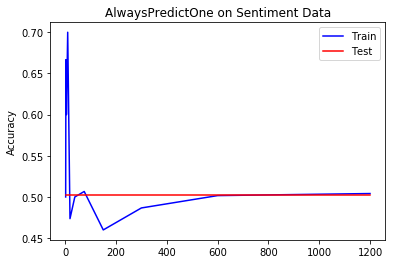

In [7]:
curve = runClassifier.learningCurveSet(dumbClassifiers.AlwaysPredictOne({}), datasets.SentimentData)
runClassifier.plotCurve('AlwaysPredictOne on Sentiment Data', curve)

You should be able to see how the accuracy changes as more training data is used. 

# Part 2: Decision trees (45%)

Next, you will build decision trees both using the python package sklearn and using your own function.

## 2.1 Training (5%)


Load the sentiment analysis dataset and transform the words in each review into a bag-of-words format (0 and 1). 

In [8]:
from sklearn.tree import DecisionTreeClassifier
import data

X,Y,dictionary = data.loadTextDataBinary('data/sentiment.tr')
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 1. 0. ... 0. 1. 0.]
(1400, 3473)
(1400,)


We have successfully loaded 1400 examples of sentiment training data. The vocabulary size is 3473 words; we can look at the first ten words (arbitrarily sorted):

In [9]:
dictionary[:10]

['intelligent',
 'science',
 'fiction',
 'thriller',
 'social',
 'satire',
 'class',
 'style',
 'set',
 'old']

Train a decision tree of depth 1 on the sentiment analysis dataset.

In [10]:
#from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, Y)
# check the default values of the DecisionTreeClassifier parameters
#DecisionTreeClassifier?
print (dt)
data.showTree(dt, dictionary)

# bad?
# -N-> class 1	(333 for class 0, 533 for class 1)
# -Y-> class 0	(358 for class 0, 176 for class 1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
bad?
-N-> class 1	(333.0 for class 0, 533.0 for class 1)
-Y-> class 0	(358.0 for class 0, 176.0 for class 1)


This shows that if you only have one question you can ask about the review it's that you should ask if the review contains the word "bad" or not. If it does not ("N") then it's probably a positive review (by a vote of 533 to 333); if it does ("Y") then it's probable a negative review (by a vote of 358 to 176).

Let's look at training accuracy for the tree of depth 1:

In [11]:
np.mean(dt.predict(X) == Y)
# 0.63642857142857145

0.6364285714285715

It's not enough to just think about training data; we need to see how well these trees generalize to new data. 

In [13]:
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)
np.mean(dt.predict(Xde) == Yde)
# 0.60499999999999998

0.605

Note: when we load the development data, we have to give it the dictionary we built on the training data so that words are mapped to integers in the same way!

Here, we see that the accuracy has dropped a bit.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU1 (2%):

Your first decision tree task is to build and show a decision tree of depth 2, and answer a few questions about it. Convince yourself whether or not it is useful to go from depth one to depth two on this data. How do you know?

In [12]:
#from sklearn.tree import DecisionTreeClassifier
new_dt = DecisionTreeClassifier(max_depth=2)
X,Y,dictionary = data.loadTextDataBinary('data/sentiment.tr')
new_dt.fit(X, Y)
# check the default values of the DecisionTreeClassifier parameters
#DecisionTreeClassifier?
print (new_dt)
data.showTree(new_dt, dictionary)
print("\nAccuracy on sentiment.tr dataset when max depth of decision tree is 2 =", np.mean(new_dt.predict(X) == Y))
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)
print("Accuracy on sentiment.de dataset when max depth of decision tree is 2 =", np.mean(new_dt.predict(Xde) == Yde))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
bad?
-N-> worst?
|    -N-> class 1	(281.0 for class 0, 514.0 for class 1)
|    -Y-> class 0	(52.0 for class 0, 19.0 for class 1)
-Y-> stupid?
|    -N-> class 0	(281.0 for class 0, 168.0 for class 1)
|    -Y-> class 0	(77.0 for class 0, 8.0 for class 1)

Accuracy on sentiment.tr dataset when max depth of decision tree is 2 = 0.66
Accuracy on sentiment.de dataset when max depth of decision tree is 2 = 0.62


[WU1 ANSWER]

It is useful to have max depth of decision tree as 2 as compared to having 1. This is because the training accuracy on training dataset 'sentiment.tr' has increased from 0.63 to 0.66 and a similar improvement in accuracy is observed on validation dataset 'sentiment.de', 0.60 to 0.62

It's important to recognize that decision trees are essentially learning conjunctions of features. In particular, you can convert a decision tree to a sequence of if-then-else statements, of the form:

if A and B and C and D then return POSITIVE elif A and B and C and !D then return NEGATIVE elif ...

This is called a "decision list." 

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU2 (1%): 
Write down the decision list corresponding to the tree that you learned of depth 2:

[WU2 ANSWER]

Here when max depth of the tree is 2 we have two questions to ask, first if the review contains the word "bad" or not and second whether the review contains the word "worst" while it does not contain the word "bad" or whether the review contains the word "stupid" when it contains the word "bad". So following will be the decision list, if NOT "bad" and  NOT "worst" then return POSITIVE elif NOT "bad" and "worst" then return NEGATIVE elif "bad" and NOT "stupid" then return NEGATIVE elif "bad" and "stupid" then return NEGATIVE

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU3 (2%): 
Build a depth 3 decision tree and "explain" it. In other words, if your boss asked you to tell her, intuitively, what your tree is doing, how would you explain it? Write a few sentences.

[WU3 ANSWER]

The decision tree with max depth of 3 is classifying whether a review is POSITIVE (Class 1) or NEGATIVE (Class 0) based on the presence or absence of certain words. At each of the three levels of the tree, a question about the existence of a particular word is questioned and based on the response (in Y or N) the review is classified as 0 or 1. In this particular case the decision list is as follows:
    1. if "bad", "worst" and "many" does not exists then classify review as POSITIVE
    2. elif "bad"and "worst" does not exists but "many" exists then classify review as POSITIVE
    3. elif "bad", "worst" and "present" does not exists then classify review as NEGATIVE
    4. elif "bad"and "worst" does not exists but "present" exists then classify review as POSITIVE
    5. elif "bad" exists but "stupid" and "wonderfully" does not exists then classify review as NEGATIVE
    6. elif "bad" exists and "stupid" does not exists but "wonderfully" exists then classify review as POSITIVE
    7. elif "bad" and "stupid" exists but "bob" does not exists then classify review as NEGATIVE
    8. elif "bad", "stupid" and "bob" exists then classify review as POSITIVE

In [13]:
third_dt = DecisionTreeClassifier(max_depth=3)
third_dt.fit(X, Y)
data.showTree(third_dt, dictionary)

bad?
-N-> worst?
|    -N-> many?
|    |    -N-> class 1	(204.0 for class 0, 274.0 for class 1)
|    |    -Y-> class 1	(77.0 for class 0, 240.0 for class 1)
|    -Y-> present?
|    |    -N-> class 0	(52.0 for class 0, 13.0 for class 1)
|    |    -Y-> class 1	(0.0 for class 0, 6.0 for class 1)
-Y-> stupid?
|    -N-> wonderfully?
|    |    -N-> class 0	(280.0 for class 0, 153.0 for class 1)
|    |    -Y-> class 1	(1.0 for class 0, 15.0 for class 1)
|    -Y-> bob?
|    |    -N-> class 0	(76.0 for class 0, 4.0 for class 1)
|    |    -Y-> class 1	(1.0 for class 0, 4.0 for class 1)


## 2.2 Underfitting and overfitting (10%)

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU4 (5%): 
For all possible depths from depth 1 to depth 20, compute training error, development error and test error (on data/sentiment.te) for the corresponding decision tree (hint: use a for loop). Plot these three curves. You can add a cell below if you want to write the code for the plot or if you must, we would accept an inserted picture of a plot created elsewhere. Make sure your axes are clearly marked.

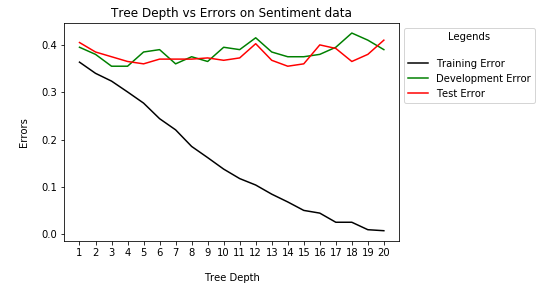

In [14]:
from sklearn.tree import DecisionTreeClassifier
import data
import numpy as np
import matplotlib.pyplot as plt


training_errors = []
dev_errors = []
test_errors =[]
depth_tracker = []
min_training_error = float('inf')
min_dev_error = float('inf')
min_test_error = float('inf')
training_depth = 0
dev_depth = 0
test_depth = 0

Xtr,Ytr,dictionary = data.loadTextDataBinary('data/sentiment.tr')
Xte,Yte,_ = data.loadTextDataBinary('data/sentiment.te', dictionary)
Xde,Yde,_ = data.loadTextDataBinary('data/sentiment.de', dictionary)

for depth in range(1,21):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(Xtr, Ytr)
    
    mean_training_error = np.mean(abs(dt.predict(Xtr) - Ytr))
    training_errors.append(mean_training_error)
    if mean_training_error<min_training_error:
        min_training_error = mean_training_error
        training_depth = depth
        
    mean_dev_error = np.mean(abs(dt.predict(Xde) - Yde))
    dev_errors.append(mean_dev_error)
    if mean_dev_error<min_dev_error:
        min_dev_error = mean_dev_error
        dev_depth = depth
        
    mean_test_error = np.mean(abs(dt.predict(Xte) - Yte))
    test_errors.append(mean_test_error)
    if mean_test_error<min_test_error:
        min_test_error = mean_test_error
        test_depth = depth
    
    depth_tracker.append(depth)

plt.plot(depth_tracker,training_errors,'black', label='Training Error')
plt.plot(depth_tracker,dev_errors,'green', label='Development Error')
plt.plot(depth_tracker,test_errors,'red', label='Test Error')
plt.xticks(np.arange(min(depth_tracker), max(depth_tracker)+1, 1.0))
plt.xlabel('\nTree Depth\n')
plt.ylabel('\nErrors\n',labelpad=1)
plt.title('Tree Depth vs Errors on Sentiment data')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title = "Legends\n")
plt.show()

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU5 (5%): 
If you were to choose the depth hyperparameter based on TRAINING data, what TEST error would you get? If you were to choose depth based on the DEV data, what TEST error would you get? Finally, if you were to choose the depth based on the TEST data, what TEST error would you get. Precisely one of these three is "correct" -- which one and why?

In [15]:
print ("Following are the test errors based on 'training data', 'dev data' and 'test data' depth hyperparameters: " + str(test_errors[training_depth-1]), test_errors[dev_depth-1],test_errors[test_depth-1], sep=", ")

Following are the test errors based on 'training data', 'dev data' and 'test data' depth hyperparameters: 0.41, 0.375, 0.355


[WU5 ANSWER]

*Choosing depth hyperparameter based on 'Dev Data' is ideal. This is because 'Dev Data' does not play a direct role in the training phase even though it could be a subset of the training dataset. 'Dev Data' helps in fine-tuning the system.*

*Choosing depth hyperparameter based on 'Test Data' is not correct in the sense that 'Test Data' is considered to be unseen data and is strongly advised not to be touched. This may lead to inconsistent results.*

*Choosing depth hyperparameter based on 'Training Data' may result in overfitting given the fact that the system is still in learning phase and on doing so the system will not be able to generalize properly later on in Dev and Test phase. Hence it is not correct.*

## 2.3 Implementing a decision tree (30%)

Our next task is to implement a decision tree classifier.  There is
stub code in ``dt.py`` that you should edit.  Decision trees are
stored as simple data structures.  Each node in the tree has
a ``.isLeaf`` boolean that tells us if this node is a leaf (as
opposed to an internal node).  Leaf nodes have a ``.label`` field
that says what class to return at this leaf.  Internal nodes have:
a ``.feature`` value that tells us what feature to split on;
a ``.left`` *tree* that tells us what to do when the feature
value is *less than 0.5*; and a ``.right`` *tree* that
tells us what to do when the feature value is *at least 0.5*.
To get a sense of how the data structure works, look at
the ``displayTree`` function that prints out a tree.

Your first task is to implement the training procedure for decision
trees.  We've provided a fair amount of the code, which should help
you guard against corner cases.  (Hint: take a look
at ``util.py`` for some useful functions for implementing
training.  Once you've implemented the training function, we can test
it on data:

In [16]:
import dt
h = dt.DT({'maxDepth': 2})
h.train(datasets.SentimentData.X, datasets.SentimentData.Y)
h
# this should print out something like this (the actual numbers attached to the branches will be different)
#Branch 2428
#  Branch 3842
#    Leaf 1.0
#    Leaf -1.0
#  Branch 3892
#    Leaf -1.0
#    Leaf 1.0

Branch 626
  Branch 683
    Leaf 1.0
    Leaf -1.0
  Branch 1139
    Leaf -1.0
    Leaf 1.0

The problem with the branches here is that words have been converted into numeric ids
for features. We can look them up. Your results here might be
different due to hashing, so you will need to change them according to the branch numbers you see in your own output above:

In [20]:
print(datasets.SentimentData.words[626])
#'bad'
print(datasets.SentimentData.words[683])
#'worst'
print(datasets.SentimentData.words[1139])
#'sequence'

bad
worst
sequence


Based on this, we can rewrite the tree (by hand) as:

In [ ]:
Branch 'bad'
  Branch 'worst'
    Leaf -1.0
    Leaf 1.0
  Branch 'sequence'
    Leaf -1.0
    Leaf 1.0

Now, you should go implement prediction.  This should be easier than
training!  We can test by:

In [21]:
runClassifier.trainTestSet(dt.DT({'maxDepth': 1}), datasets.SentimentData)
#Training accuracy 0.630833, test accuracy 0.595
runClassifier.trainTestSet(dt.DT({'maxDepth': 3}), datasets.SentimentData)
#Training accuracy 0.701667, test accuracy 0.6175
runClassifier.trainTestSet(dt.DT({'maxDepth': 5}), datasets.SentimentData)
#Training accuracy 0.765833, test accuracy 0.62

Training accuracy 0.6308333333333334, test accuracy 0.595
Training accuracy 0.7016666666666667, test accuracy 0.6175
Training accuracy 0.7658333333333334, test accuracy 0.625


Looks like it does better than the dumb classifiers on training data,
as well as on test data!  Hopefully we can do even better in the
future!

We can use more ``runClassifier`` functions to generate learning
curves and hyperparameter curves:

Training classifier on 2 points...
Training accuracy 1.0, test accuracy 0.5
Training classifier on 3 points...
Training accuracy 1.0, test accuracy 0.5
Training classifier on 5 points...
Training accuracy 1.0, test accuracy 0.5
Training classifier on 10 points...
Training accuracy 1.0, test accuracy 0.595
Training classifier on 19 points...
Training accuracy 1.0, test accuracy 0.48
Training classifier on 38 points...
Training accuracy 1.0, test accuracy 0.62
Training classifier on 75 points...
Training accuracy 1.0, test accuracy 0.56
Training classifier on 150 points...
Training accuracy 0.9533333333333334, test accuracy 0.56
Training classifier on 300 points...
Training accuracy 0.9266666666666666, test accuracy 0.575
Training classifier on 600 points...
Training accuracy 0.8816666666666667, test accuracy 0.5975
Training classifier on 1200 points...
Training accuracy 0.8333333333333334, test accuracy 0.6475


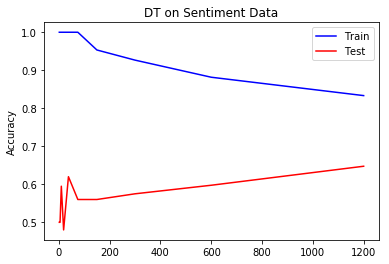

In [22]:
curve = runClassifier.learningCurveSet(dt.DT({'maxDepth': 9}), datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data', curve)

This plots training and test accuracy as a function of the number of
data points (x-axis) used for training and y-axis is accuracy.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU6 (2%):
We should see training accuracy (roughly) going down and test
accuracy (roughly) going up.  Why does training accuracy tend to go
*down?* Why is test accuracy not monotonically increasing? You should
also see jaggedness in the test curve toward the left. Why?

[WU6 ANSWER]

*As the number of data points increases, the training accuracy roughly goes down while test accuracy roughly goes up. It is because more the number of data points the more it is difficult to fit all of them and in doing so training accuracy falls however at this cost of falling training accuracy, the testing accuracy is better for more number of test data points as the classification will be better. This is in co-relation with the fact that if the model is trained relatively better then it performs poorly on test data. In other words, overfitting during training phase may lead to low test accuracy.*

*Before the red curve (test curve) become somewhat stable a jaggedness is noticed. This is because of the availability of less number of test data samples, initially, which leads to inefficiency in classification. As the number of samples increases it can be concluded that the model now has sufficient information to classify these test data points and thereby the test accuracy increases thereafter.*

We can also generate similar curves by changing the maximum depth
hyperparameter:

Training classifier with maxDepth=1...
Training accuracy 0.6308333333333334, test accuracy 0.595
Training classifier with maxDepth=2...
Training accuracy 0.6675, test accuracy 0.5825
Training classifier with maxDepth=4...
Training accuracy 0.7325, test accuracy 0.6375
Training classifier with maxDepth=6...
Training accuracy 0.7891666666666667, test accuracy 0.635
Training classifier with maxDepth=8...
Training accuracy 0.8233333333333334, test accuracy 0.6475
Training classifier with maxDepth=12...
Training accuracy 0.8633333333333333, test accuracy 0.6425
Training classifier with maxDepth=16...
Training accuracy 0.8883333333333333, test accuracy 0.625


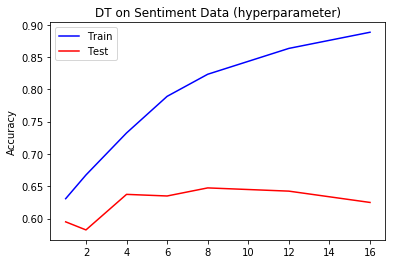

In [23]:
curve = runClassifier.hyperparamCurveSet(dt.DT({}), 'maxDepth', [1,2,4,6,8,12,16], datasets.SentimentData)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

Now, the x-axis is the value of the maximum depth.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU7 (3%):
You should see training accuracy monotonically increasing and
test accuracy making something like a hill.  Which of these is
*guaranteed* to happen and which is just something we might expect to
happen?  Why?

[WU7 ANSWER]

*It is guaranteed that training accuracy will increase montonically with increase in max-depth. This is because with increase in max-depth we are in a way forcing our model to overfit training data which is nothing but attempting to achieve a higher training accuracy.*

*However, the curve obtained for test accuracy against increasing max-depth can be expected but can not be guaranteed. This is because it depends on the test samples and how good they represent the problem definition and how much skewed they are. In the case above, it can be interpreted that when max-depth is 8 we achieve the maximum test accuracy indicating optimal fit. Afterwhich, the test accuracy starts declining. This could be the point where the model might have started overfitting on the training samples.*

# Part 3: Nearest Neighbors (30 %)


## 3.1 Warm-up exercise (0%)

Our first task will be to use KNN to classify digits. In other words, we get an image 
of a hand-drawn digit (28x28 pixels, greyscale), and have to decide what digit it is. 
To make life simpler, we'll consider only the binary classification version, in two 
setups: (A) distinguishing ONEs from TWOs and (B) distinguishing TWOs from THREEs.

(A) In the data directory, you'll find two .png files that show the training data. 
We are displaying them here. Are there any digits that you, as a human, have difficulty distinguishing 
(if so, list the row/column, where 0,0 is the upper left and 9,9 is the bottom right). 
Which of these (1vs2 or 2vs3) do you expect to be a harder classification problem?

***In 1vs2 - (3,7), (4,0) and (4,6) while in 2vs3 - (0,0), (5,9), (6,2), (8,8) and (9,5) are difficult to distinguish somewhat. According to me, 2vs3 could be a harder classification problem as some of images may look similar to 2 and 3 both.***

<table>
 <tr>
  <td><img src="data/1vs2.tr.png" width="60%"></td>
  <td><img src="data/2vs3.tr.png" width="60%"></td>
 </tr>
</table>

(B) Let's verify that KNN does very well on training data. Run the following:

In [17]:
import knn_warmup

# importlib.reload(knn_warmup)

tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0

0.0


In [18]:
import knn_warmup

# importlib.reload(knn_warmup)

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.tr", 100)
allK = [1]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0

0.0


This says "do KNN, with 1vs2.tr as the training data and 1vs2.tr as the testing data, using K=1." 
The 0.0 is the error rate, which is zero. Verify the same thing for 2vs3.tr.

(C) The ``knn_warmup.py`` implementation will let you specify multiple values for K and get error 
rates for all of them. In particular, you can say something like:

In [19]:
allK = [1,5,10,25,50,100]
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

# 0.0	0.08	0.12	0.16	0.28	0.5

0.0	0.03	0.06	0.07	0.16	0.5


In [28]:
allK = [1,3,5,7,9,11,13,15,17,19,21]
tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.de", 100)
print("For 1vs2")
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.de", 100)
print("\nFor 2vs3")
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

For 1vs2
0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.16	0.16	0.16	0.16

For 2vs3
0.1	0.04	0.06	0.06	0.08	0.04	0.08	0.06	0.06	0.08	0.08


This runs the same thing for six values of K (1, 5, ..., 100) and prints the respective 
error rates. Notice that for K=100 the error rate is 50% -- why does this happen?
***This happens because of underfitting. Also, for K=1 error rate is 0% which is because of overfit.***

(D) Repeat the same exercise, this time evaluating on the development data, and using 
odd values of K ranging from 1 to 21. Do this for both 1vs2 and 2vs3. Which one is 
harder? For each, what is the optimal value of K? (In the case of ties, how would you 
choose to break ties?)
***2vs3 is harder to classify because an inconsistency in error rate is seen. Optimal value of K should be 13 for 1vs2 as error rate is unchanged beyond this K value. Optimal value of K should be 13 again for 2vs3 because it seems like that the error rate starts getting stangnant at 8% for K values greater than 17 but this error rate was achieved earlier when K was equal to 9 and 13. Since at K = 9 it could be the case of overfit and so break ties we can go ahead with such a value of K where same error rate is obtained.***

(E) Now, go edit knn_warmup.py. This might take a bit of effort since you'll have to figure out 
what it's doing. But the function I want you to look at is "classifyKNN." This takes D 
(the training data) and knn (the list of the K nearest neighbors, together with their 
distances). It iterates over each of the (dist,n) nearest neighbors. Here, dist is the 
distance and n is the training example id, so D[n] is the corresponding training example. 
It then "votes" this into a prediction ``yhat``.

Modify this function so that each example gets a weighted vote, where its weight is 
equal to exp(-dist). This should be a one- or two-liner.

Rerun the same experiments as in (D). Does this help or hurt? What do you observe as K 
gets larger and WHY do you observe this? **Weighted vote helps because we can observe that the error rate gets reduced to 8% from 16% for 1vs2 and for K-values greater than equal to 13. Similarly, it gets reduced slighlty from 8% to 6% for K-values greater than equal to 17.**

If you want to play around, try exp(-dist / CONSTANT) where CONSTANT now is a hyperparameter. 
What happens as CONSTANT tends toward zero? Tends toward infinity? **When CONSTANT tends towards zero then there is no change in error rate for different values of K. And when CONSTANT tends towards infinity then error rate is same as what it is obtained in (D) i.e. there is no effect of weight (as weight is effectively 1).**

In [2]:
import knn_warmup
allK = [1,3,5,7,9,11,13,15,17,19,21]
tr = knn_warmup.loadDigitData("data/1vs2.tr")
te = knn_warmup.loadDigitData("data/1vs2.de", 100)
print("For 1vs2")
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

tr = knn_warmup.loadDigitData("data/2vs3.tr")
te = knn_warmup.loadDigitData("data/2vs3.de", 100)
print("\nFor 2vs3")
print("\t".join([str(err) for err in knn_warmup.computeErrorRate(tr, te, allK)]))

For 1vs2
0.04	0.06	0.08	0.08	0.06	0.06	0.08	0.08	0.08	0.08	0.08

For 2vs3
0.1	0.04	0.06	0.06	0.08	0.06	0.08	0.08	0.06	0.06	0.06


## 3.2 Implementing a KNN classifier (20%)

To get started with geometry-based classification, we will implement a
nearest neighbor classifier that supports KNN classification.  
This should go in ``knn.py``.  The
only function here that you have to do anything about is
the ``predict`` function, which does all the work.

In order to test your implementation, here are some outputs:

In [7]:
import knn

runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.TennisData)
#Training accuracy 1, test accuracy 1
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.TennisData)
#Training accuracy 0.785714, test accuracy 0.833333
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.TennisData)
#Training accuracy 0.857143, test accuracy 0.833333

Training accuracy 1.0, test accuracy 1.0
Training accuracy 0.7857142857142857, test accuracy 0.8333333333333334
Training accuracy 0.8571428571428571, test accuracy 0.8333333333333334


You can also try it on the digits data:

In [8]:
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 1}), datasets.DigitData)
# Training accuracy 1, test accuracy 0.94
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 3}), datasets.DigitData)
# Training accuracy 0.94, test accuracy 0.93
runClassifier.trainTestSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.DigitData)
# Training accuracy 0.92, test accuracy 0.92

Training accuracy 1.0, test accuracy 0.94
Training accuracy 0.94, test accuracy 0.93
Training accuracy 0.92, test accuracy 0.92


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU8 (5%):
For the digits data, generate train/test curves for
varying values of K (you figure out what are good ranges,
this time).  Include those curves. Do you see evidence of overfitting and underfitting?  Next, using K=5, generate learning curves for this
data.

Training classifier with K=1...
Training accuracy 1.0, test accuracy 0.94
Training classifier with K=2...
Training accuracy 0.94, test accuracy 0.93
Training classifier with K=3...
Training accuracy 0.94, test accuracy 0.93
Training classifier with K=4...
Training accuracy 0.91, test accuracy 0.9
Training classifier with K=5...
Training accuracy 0.92, test accuracy 0.92
Training classifier with K=6...
Training accuracy 0.9, test accuracy 0.91
Training classifier with K=7...
Training accuracy 0.9, test accuracy 0.91
Training classifier with K=8...
Training accuracy 0.87, test accuracy 0.89
Training classifier with K=9...
Training accuracy 0.88, test accuracy 0.89
Training classifier with K=10...
Training accuracy 0.86, test accuracy 0.87


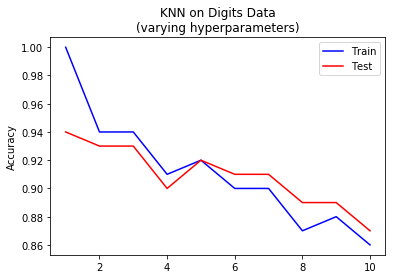

Training classifier on 2 points...
Training accuracy 0.5, test accuracy 0.5
Training classifier on 4 points...
Training accuracy 0.75, test accuracy 0.5
Training classifier on 7 points...
Training accuracy 0.5714285714285714, test accuracy 0.71
Training classifier on 13 points...
Training accuracy 0.6153846153846154, test accuracy 0.81
Training classifier on 25 points...
Training accuracy 0.8, test accuracy 0.85
Training classifier on 50 points...
Training accuracy 0.88, test accuracy 0.86
Training classifier on 100 points...
Training accuracy 0.92, test accuracy 0.92


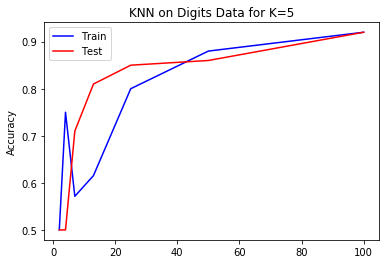

In [9]:
curve = runClassifier.hyperparamCurveSet(knn.KNN({'isKNN': True}), 'K', [1,2,3,4,5,6,7,8,9,10], datasets.DigitData)
runClassifier.plotCurve('KNN on Digits Data\n(varying hyperparameters)', curve)
curve = runClassifier.learningCurveSet(knn.KNN({'isKNN': True, 'K': 5}), datasets.DigitData)
runClassifier.plotCurve('KNN on Digits Data for K=5', curve)

## 3.3 The curse of dimensionality (10%)

If you have numpy and matplotlib correctly installed, you should be able to run
the code in the following cell
and get a picture of five histograms. Open up ``HighD.py`` to understand what's 
being plotted. Essentially, it's generating 200 random points in D dimensions 
(where D is being varied) and computing pairwise distances between these points.

D=2, average distance=0.5107852695117978
D=8, average distance=1.1307987856367847
D=32, average distance=2.297473556742213
D=128, average distance=4.6067337811485185
D=512, average distance=9.253422120019442


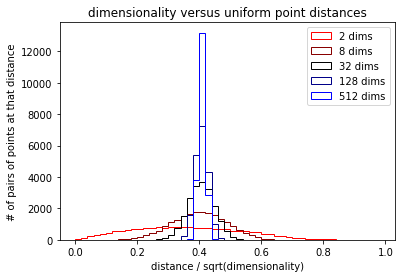

In [8]:
import HighD
import numpy as np

N    = 200                   # number of examples
Dims = [2, 8, 32, 128, 512]   # dimensionalities to try
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
Bins = arange(0, 1, 0.02)

plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')
plt.title('dimensionality versus uniform point distances')

for i,d in enumerate(Dims):
    distances = HighD.computeDistances(HighD.generateUniformDataset(d, N))
    print("D={0}, average distance={1}".format(d, mean(distances) * sqrt(d)))
    plt.hist(distances,
             Bins,
             histtype='step',
             color=Cols[i])
    if HighD.waitForEnter:
        plt.legend(['%d dims' % d for d in Dims])
        plt.show(False)
        x = raw_input('Press enter tocontinue...')


plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig1.pdf')
plt.show()

As you can see in the histograms, as the dimensionality increases, the distances between pairs of points become more or less concentrated around a single value.

In the code, instead of plotting distance on the x-axis, we're plotting (distance/sqrt(D)). Why is this the right thing to do?
<u>In order to compare the plots more easily.</u>

The goal here is to look
at whether what we found for uniformly random data points holds for
naturally occurring data (like the digits data) too! We must hope that
it doesn't, otherwise KNN has no hope of working, but let's verify.

The problem is: the digits data is 784 dimensional, period, so it's
not obvious how to try "different dimensionalities." For now, we will
do the simplest thing possible: if we want to have 128 dimensions, we
will just select 128 features randomly.

This is your task, which you can accomplish by munging together
``HighD.py`` and ``KNN.py`` and making appropriate modifications.

<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU9 (10%):
**A.** First, get a histogram of the raw digits data in 784
dimensions. You'll probably want to use the ``exampleDistance``
function from KNN together with the plotting in ``HighD``. 

**B.** Extend
``exampleDistance`` so that it can subsample features down to some
fixed dimensionality. For example, you might write
``subsampleExampleDistance(x1,x2,D)``, where ``D`` is the target
dimensionality. In this function, you should pick ``D`` dimensions at
random (I would suggest generating a permutation of the number
[1..784] and then taking the first D of them), and then compute the
distance but _only_ looking at those dimensions. 

**C.** Generate an
equivalent plot to HighD with D in [2, 8, 32, 128, 512] but for the
digits data rather than the random data. Include a copy of both plots
and describe the differences.

D=784, average distance=9.107636155102968


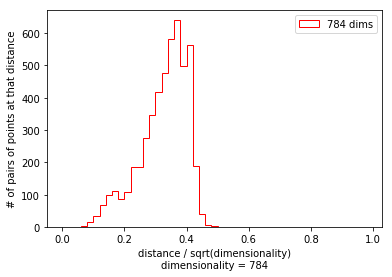

In [9]:
import HighD, datasets
from pylab import *

## loadDigitsData module is defined in datasets.py
## exampleDistance module is define in HighD.py which uses subsampleExampleDistance module defined in HighD.py

data = datasets.loadDigitsData('data/1vs2.tr')
N = len(data)
Dims = 784
Bins = arange(0, 1, 0.02)
Cols = ['#FF0000', '#880000', '#000000', '#000088', '#0000FF']
distances = []

plt.xlabel('distance / sqrt(dimensionality)\ndimensionality = 784')
plt.ylabel('# of pairs of points at that distance')

for i in range(N):
    for j in range(i):
        distances.append(HighD.exampleDistance(data[i][0],data[j][0])  / sqrt(Dims))
print("D={0}, average distance={1}".format(Dims, mean(distances) * sqrt(Dims)))
plt.hist(distances,
         Bins,
         histtype='step',
         color=Cols[0])

plt.legend(['%d dims' %Dims])
plt.savefig('fig2.pdf')
plt.show()

D=2, average distance=0.05345260293292026
D=8, average distance=0.19146569944736633
D=32, average distance=0.5906812884960715
D=128, average distance=1.3805151775001367
D=512, average distance=2.834425631774124


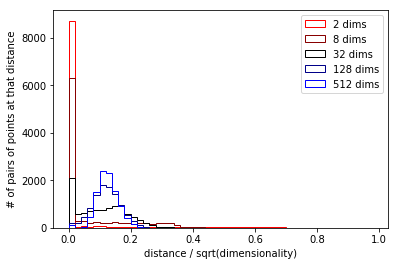

In [10]:
import HighD, datasets
from pylab import *
import numpy

## loadDigitsData module is defined in datasets.py
## subsampleExampleDistance module is defined in HighD.py

data = datasets.loadDigitsData('data/1vs2.tr')
N = len(data)
Dims = [2, 8, 32, 128, 512]
plt.xlabel('distance / sqrt(dimensionality)')
plt.ylabel('# of pairs of points at that distance')

for k,d in enumerate(Dims):
    subsampled_ex_distances = []
    for i in range(N):
        for j in range(n):
            subsampled_ex_distances.append(HighD.subsampleExampleDistance(data[i][0],data[j][0], d))

    print("D={0}, average distance={1}".format(d, mean(subsampled_ex_distances) * sqrt(d)))
    plt.hist(subsampled_ex_distances,
             Bins,
             histtype='step',
             color=Cols[k])
        



plt.legend(['%d dims' % d for d in Dims])
plt.savefig('fig3.pdf')
plt.show()

[WU9.C ANSWER]

When the graph obtained on 'random data' is compared with that of graph obtained on 'digits data' we can infer that for 'digits data', peak value (i.e max # of pairs of points at any dimension) and accumulation of # of pairs of points is in between 0-0.2 values on x-axis (dist/sqrt(D)) while it is near around 0.4 for 'random data'. Moreover, the max # of pairs of points is more for higher dimensions in 'digits data' while it is more for lower dimensions in 'random data'

# Part 4: Perceptron (20%)

This final section is all about using perceptrons to make
predictions. You are given a partial perceptron implementation in
``perceptron.py``.

The last implementation you have is for the perceptron; see
``perceptron.py`` where you will have to implement part of the
``nextExample`` function to make a perceptron-style update.

Once you've implemented this, the magic in the ``Binary`` class will
handle training on datasets for you, as long as you specify the number
of epochs (passes over the training data) to run:

In [1]:
import runClassifier
import datasets
import perceptron
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.TennisData)
# Training accuracy 0.642857, test accuracy 0.666667
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.TennisData)
# Training accuracy 0.857143, test accuracy 1

Training accuracy 0.6428571428571429, test accuracy 0.6666666666666666
Training accuracy 0.8571428571428571, test accuracy 1.0


You can view its predictions on the two dimensional data sets:

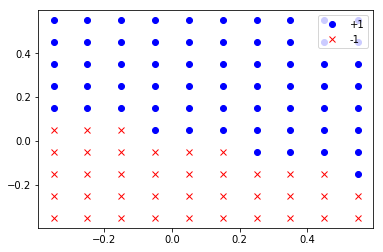

w=array([ 7.3, 18.9]), b=0.0


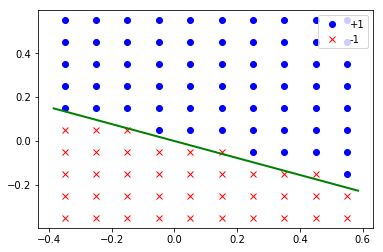

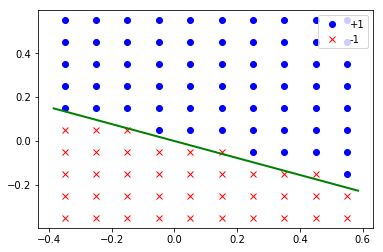

In [2]:
import runClassifier
import datasets
import perceptron
from numpy import *
from pylab import *

import sys
import util
import binary

runClassifier.plotData(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
h = perceptron.Perceptron({'numEpoch': 200})
h.train(datasets.TwoDDiagonal.X, datasets.TwoDDiagonal.Y)
print(h)
# w=array([  7.3,  18.9]), b=0.0
runClassifier.plotClassifier(array([ 7.3, 18.9]), 0.0)

You should see a linear separator that does a pretty good (but not
perfect!) job classifying this data.

Finally, we can try it on the sentiment data:

In [3]:
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 1}), datasets.SentimentData)
# Training accuracy 0.835833, test accuracy 0.755
runClassifier.trainTestSet(perceptron.Perceptron({'numEpoch': 2}), datasets.SentimentData)
# Training accuracy 0.955, test accuracy 0.7975

Training accuracy 0.8358333333333333, test accuracy 0.755
Training accuracy 0.955, test accuracy 0.7975


<img src="data/kitten.jpeg" width="100px" align="left" float="left"/>
<br><br><br>

## WU10 (5%):
Using the tools provided, generate (a) a learning curve
(x-axis=number of training examples) for the perceptron (5 epochs) on
the sentiment data and (b) a plot of number of epochs versus
train/test accuracy on the entire dataset.

Training classifier on 2 points...
Training accuracy 1.0, test accuracy 0.51
Training classifier on 3 points...
Training accuracy 1.0, test accuracy 0.51
Training classifier on 5 points...
Training accuracy 1.0, test accuracy 0.53
Training classifier on 10 points...
Training accuracy 1.0, test accuracy 0.5025
Training classifier on 19 points...
Training accuracy 1.0, test accuracy 0.525
Training classifier on 38 points...
Training accuracy 1.0, test accuracy 0.5575
Training classifier on 75 points...
Training accuracy 0.9866666666666667, test accuracy 0.675
Training classifier on 150 points...
Training accuracy 0.9866666666666667, test accuracy 0.715
Training classifier on 300 points...
Training accuracy 0.99, test accuracy 0.7375
Training classifier on 600 points...
Training accuracy 0.9933333333333333, test accuracy 0.8025
Training classifier on 1200 points...
Training accuracy 0.9933333333333333, test accuracy 0.815


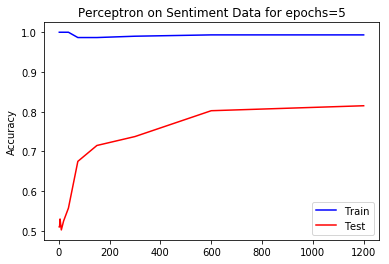

Training classifier with numEpoch=1...
Training accuracy 0.8358333333333333, test accuracy 0.755
Training classifier with numEpoch=2...
Training accuracy 0.955, test accuracy 0.7975
Training classifier with numEpoch=3...
Training accuracy 0.9366666666666666, test accuracy 0.755
Training classifier with numEpoch=4...
Training accuracy 0.995, test accuracy 0.8125
Training classifier with numEpoch=5...
Training accuracy 0.9933333333333333, test accuracy 0.815
Training classifier with numEpoch=6...
Training accuracy 0.9941666666666666, test accuracy 0.7875
Training classifier with numEpoch=7...
Training accuracy 0.9933333333333333, test accuracy 0.78
Training classifier with numEpoch=8...
Training accuracy 1.0, test accuracy 0.81
Training classifier with numEpoch=9...
Training accuracy 1.0, test accuracy 0.81
Training classifier with numEpoch=10...
Training accuracy 1.0, test accuracy 0.81


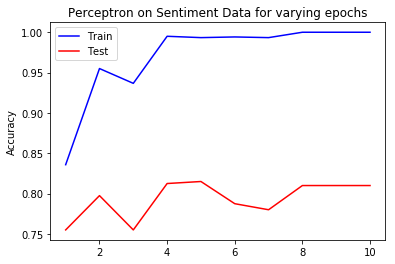

In [10]:
curve = runClassifier.learningCurveSet(perceptron.Perceptron({'numEpoch': 5}),datasets.SentimentData)
runClassifier.plotCurve('Perceptron on Sentiment Data for epochs=5', curve)
curve = runClassifier.hyperparamCurveSet(perceptron.Perceptron({'numEpoch': 1}), 'numEpoch', [1,2,3,4,5,6,7,8,9,10], datasets.SentimentData)
runClassifier.plotCurve('Perceptron on Sentiment Data for varying epochs', curve)